<center><h1>EXERCISE NO. 4</h1></center>

<center><h1>Linear Filters, Histogram Shifting, Threshold, Negative, Contrast Switching and DFT</h1></center>

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
img = cv2.imread(r'lena.png') #Replace with your image path
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cv2.imshow('lena',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

<h3>Linear Filters</h3>

In [3]:
new_img = gray.copy()

# Convert to float32 for precise calculations
new_img = new_img.astype(np.float32)

# Define Kernels
box_kernel = np.array([[1, 1, 1],
                       [1, 1, 1],
                       [1, 1, 1]]) / 9

gass_kernel = np.array([[1, 2, 1],
                        [2, 4, 2],
                        [1, 2, 1]]) / 16

sharpen_kernel = np.array([[ 0, -1,  0], 
                           [-1,  5, -1], 
                           [ 0, -1,  0]])

sobel_x_kernel = np.array([[-1, 0, 1], 
                            [-2, 0, 2], 
                            [-1, 0, 1]])

# Get image dimensions
height, width = new_img.shape
pad = box_kernel.shape[0] // 2  # Kernel size is 3, so pad = 1

# Apply zero-padding
padded_img = np.pad(new_img, ((pad, pad), (pad, pad)), mode='constant', constant_values=0)

# Initialize filtered images
filter_img_1 = np.zeros_like(new_img)
filter_img_2 = np.zeros_like(new_img)
filter_img_3 = np.zeros_like(new_img)
filter_img_4 = np.zeros_like(new_img)

# Apply Box Blur filter
for y in range(height):
    for x in range(width):
        region = padded_img[y:y+3, x:x+3]
        filter_img_1[y, x] = np.sum(region * box_kernel)

# Apply Gaussian Blur filter
for y in range(height):
    for x in range(width):
        region = padded_img[y:y+3, x:x+3]
        filter_img_2[y, x] = np.sum(region * gass_kernel)

# Apply Sharpening filter
for y in range(height):
    for x in range(width):
        region = padded_img[y:y+3, x:x+3]
        filter_img_3[y, x] = np.sum(region * sharpen_kernel)

# Apply Sobel filter for edge detection
for y in range(height):
    for x in range(width):
        region = padded_img[y:y+3, x:x+3]
        filter_img_4[y, x] = np.sum(region * sobel_x_kernel)

# Clip values to valid image range [0, 255] and convert to uint8
filter_img_1 = np.clip(filter_img_1, 0, 255).astype(np.uint8)
filter_img_2 = np.clip(filter_img_2, 0, 255).astype(np.uint8)
filter_img_3 = np.clip(filter_img_3, 0, 255).astype(np.uint8)

# Sobel output can have negative values, take absolute before clipping
filter_img_4 = np.abs(filter_img_4)
filter_img_4 = np.clip(filter_img_4, 0, 255).astype(np.uint8)


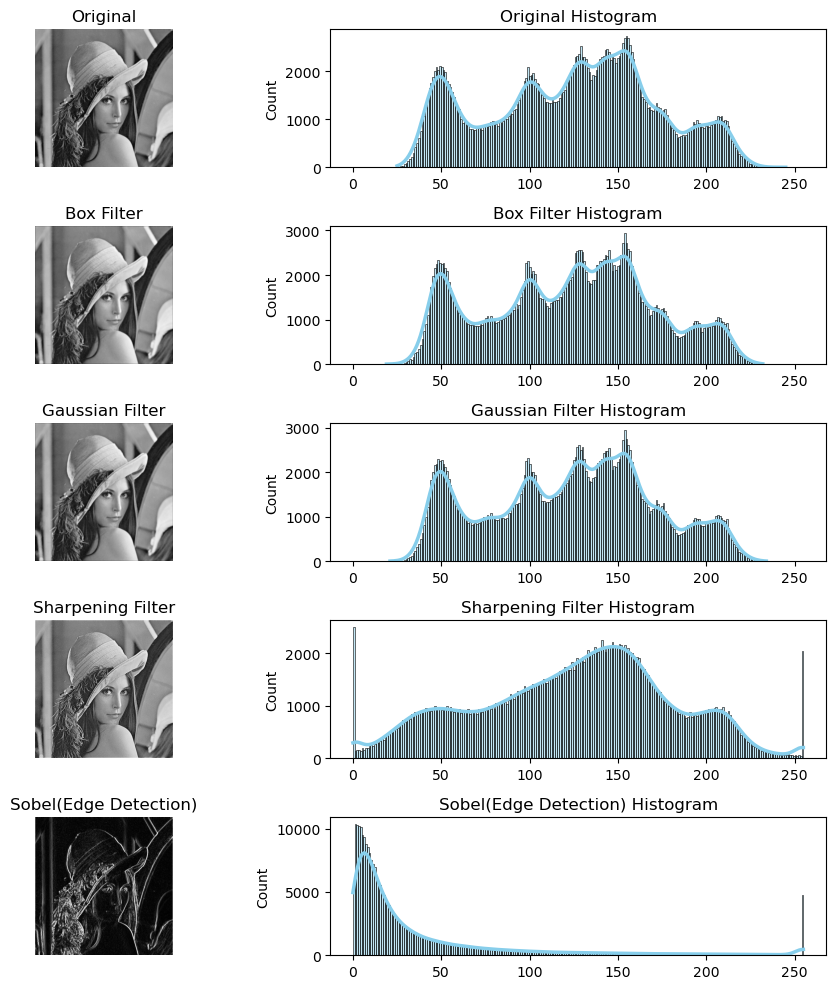

In [4]:
images = [new_img, filter_img_1, filter_img_2, filter_img_3, filter_img_4]
titles = ["Original", "Box Filter", "Gaussian Filter", "Sharpening Filter", "Sobel(Edge Detection)"]

nrows = 5
ncols = 2

plt.figure(figsize=(10, 10))  # Adjust figure size

for i, img in enumerate(images):
    # Plot Image
    plt.subplot(nrows, ncols, 2 * i + 1)
    plt.imshow(img, cmap='gray')
    plt.title(titles[i])
    plt.axis('off')

    # Plot Histogram
    plt.subplot(nrows, ncols, 2 * i + 2)
    sns.histplot(img.ravel(), bins=256, binrange=(0, 255), kde=True, 
                 color='skyblue', edgecolor="black", linewidth=0.4,
                 line_kws={"color": "black", "linewidth": 2.5})  # Set KDE to black
    plt.title(f"{titles[i]} Histogram")

plt.tight_layout()
plt.show()

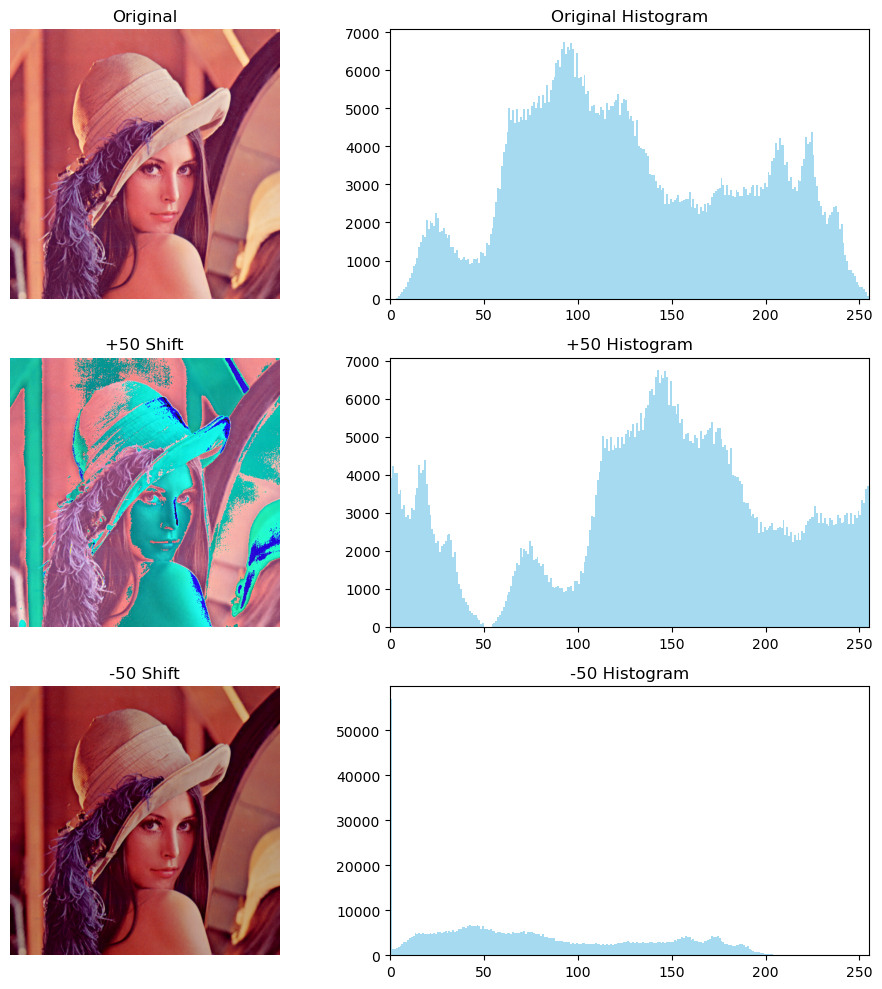

In [5]:
def histogram_shift(image, shift_value):
    return np.clip(image + shift_value, 0, 255).astype(np.uint8)

# Load grayscale image
#image = cv2.imread(r'C:\Users\HARIRAGAVENDRA\Pictures\opencv\lena.png')
#rgb_img = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

# Apply histogram shifting
shift_positive = histogram_shift(rgb_img, 50)  # Brightening
shift_negative = histogram_shift(rgb_img, -50) # Darkening

# Plot original and shifted images with histograms
fig, axes = plt.subplots(3, 2, figsize=(10, 10))
titles = ["Original", "Original Histogram", "+50 Shift", "+50 Histogram", "-50 Shift", "-50 Histogram"]
images = [rgb_img, shift_positive, shift_negative]

for i in range(3):
    # Show image
    axes[i, 0].imshow(images[i], cmap='gray')
    axes[i, 0].set_title(titles[i * 2])
    axes[i, 0].axis('off')
    
    # Show histogram
    axes[i, 1].hist(images[i].ravel(), bins=256, range=(0, 256), color='skyblue', alpha=0.75)
    axes[i, 1].set_title(titles[i * 2 + 1])
    axes[i, 1].set_xlim([0, 255])

plt.tight_layout()
plt.show()

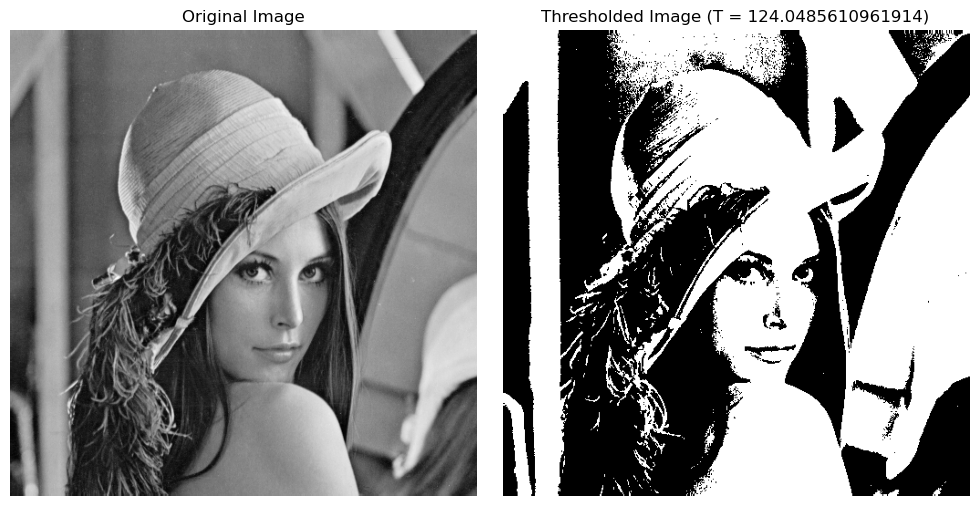

In [ ]:
def manual_threshold(image, threshold):
    height, width = image.shape
    thresholded = np.zeros((height, width), dtype=np.uint8)

    for y in range(height):
        for x in range(width):
            if image[y, x] > threshold:
                thresholded[y, x] = 255  # White pixel
            else:
                thresholded[y, x] = 0  # Black pixel

    return thresholded

# Load a grayscale image

# Set threshold value
threshold_value = np.mean(gray)

# Apply manual thresholding
thresholded_image = manual_threshold(new_img, threshold_value)

# Plot the results
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(new_img, cmap='gray')
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(thresholded_image, cmap='gray')
plt.title(f"Thresholded Image (T = {threshold_value})")
plt.axis("off")

plt.tight_layout()
plt.show()

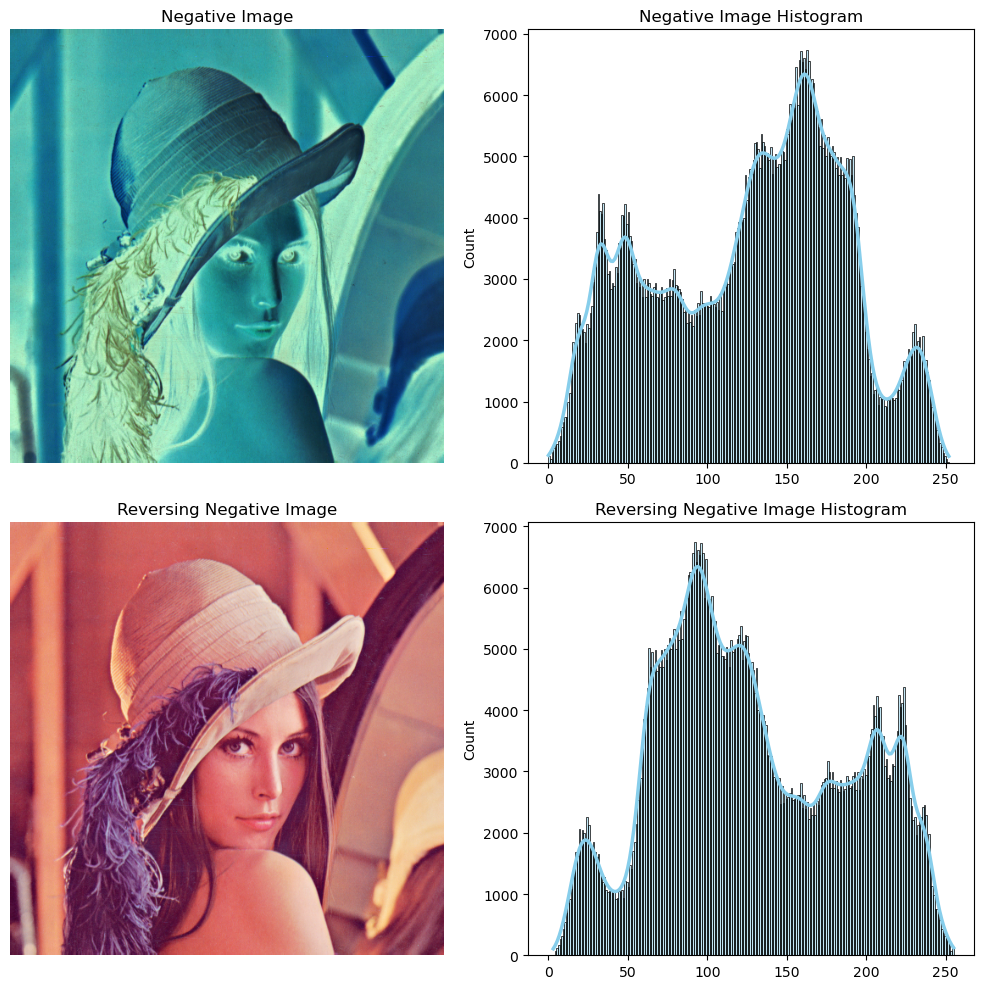

In [ ]:
#Negative Image
#rgb_img = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
negative_img = (255-rgb_img)
reversing_negative = (255-(255-rgb_img))

images = [negative_img, reversing_negative]
titles = ["Negative Image", "Reversing Negative Image"]
 
nrows = 2
ncols = 2

plt.figure(figsize=(10, 10))

for i, img in enumerate(images):
    # Plot Image
    plt.subplot(nrows, ncols, 2 * i + 1)
    plt.imshow(img, cmap='gray')
    plt.title(titles[i])
    plt.axis('off')

    # Plot Histogram
    plt.subplot(nrows, ncols, 2 * i + 2)
    sns.histplot(img.ravel(), bins=256, binrange=(0, 255), kde=True, 
                 color='skyblue', edgecolor="k", linewidth=0.5,
                 line_kws={"color": "black", "linewidth": 2.5})  # Set KDE to black
    plt.title(f"{titles[i]} Histogram")

plt.tight_layout()
plt.show()

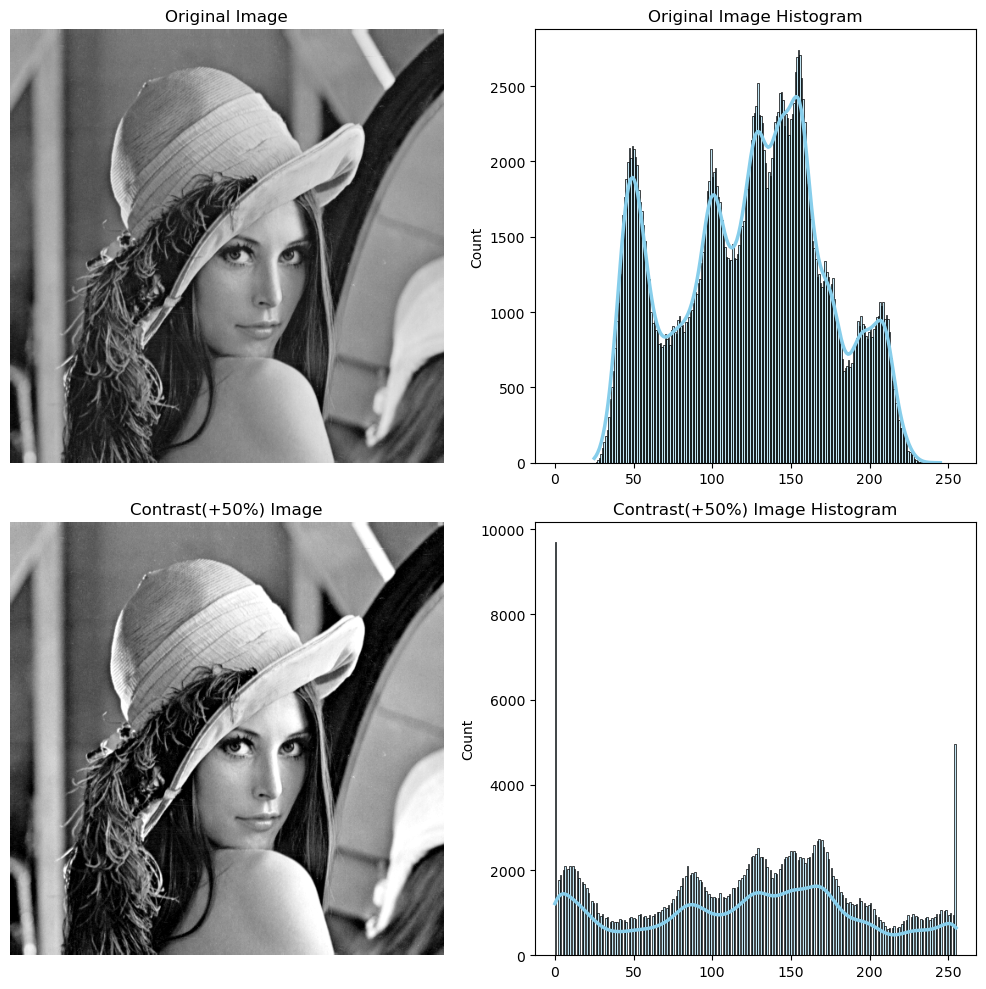

In [ ]:
def contrast_image(image, alpha):
    return np.clip(alpha*(image-128)+128,0,255).astype(np.uint8)

#image = cv2.imread(r'lena.png', cv2.IMREAD_GRAYSCALE)
#rgb_img = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
alpha = 1.5
enhanced_image = contrast_image(new_img, alpha)

images = [new_img, enhanced_image]
titles = ["Original Image", "Contrast(+50%) Image"]

nrows = 2
ncols = 2

plt.figure(figsize=(10, 10))  # Adjust figure size

for i, img in enumerate(images):
    # Plot Image
    plt.subplot(nrows, ncols, 2 * i + 1)
    plt.imshow(img, cmap='gray')
    plt.title(titles[i])
    plt.axis('off')

    # Plot Histogram
    plt.subplot(nrows, ncols, 2 * i + 2)
    sns.histplot(img.ravel(), bins=256, binrange=(0, 255), kde=True, 
                 color='skyblue', edgecolor="k", linewidth=0.5,
                 line_kws={"color": "black", "linewidth": 2.5})  # Set KDE to black
    plt.title(f"{titles[i]} Histogram")

plt.tight_layout()
plt.show()

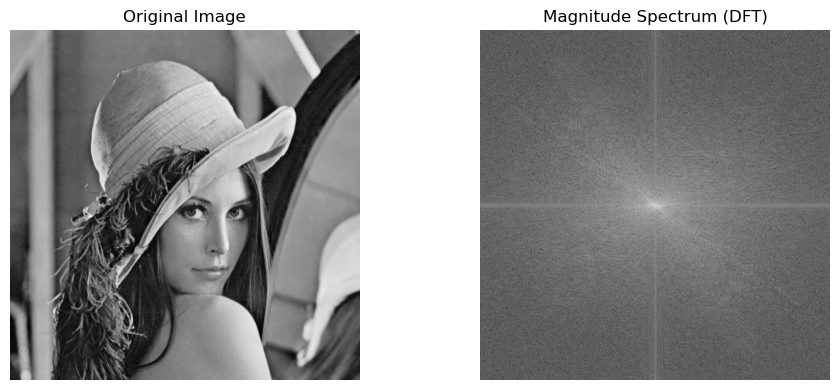

In [ ]:
# Create a sample 4x4 image (grayscale)
#image = image = cv2.imread(r'lena.png', cv2.IMREAD_GRAYSCALE)

# Compute DFT
dft = cv2.dft(np.float32(new_img), flags=cv2.DFT_COMPLEX_OUTPUT)

# Shift zero frequency component to the center
dft_shift = np.fft.fftshift(dft)

# Compute magnitude spectrum
magnitude_spectrum = 20 * np.log(cv2.magnitude(dft_shift[:, :, 0], dft_shift[:, :, 1]) + 1)

# Plot original and magnitude spectrum
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.imshow(new_img, cmap='gray')
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title("Magnitude Spectrum (DFT)")
plt.axis("off")

plt.tight_layout()
plt.show()